In [1]:
import os
import sys
import torch

import numpy as np
import albumentations as album
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp

from torchmetrics import JaccardIndex
from torchmetrics.detection.mean_ap import MeanAveragePrecision

sys.path.insert(0, '..')
from loaders.datasets import AmsterdamDataset
from utils.general import visualize
from utils.augmentation import *

In [2]:
preprocessing_fn = smp.encoders.get_preprocessing_fn('resnet18', 'imagenet')
model = torch.load(os.path.join('..', 'models', 'weights', 'rn18_unet_6px_e50.pth'))

# images = os.path.join('..', 'data', 'images')
# annotations = os.path.join('..', 'data', 'spectrum-batch-1', 'annotations.json')

images = os.path.join('..', 'data', 'images')
annotations = os.path.join('..', 'data', 'fences-quays', 'annotations', 'test-annotations-6px.json')

data = AmsterdamDataset(images, annotations, preprocessing=get_preprocessing(preprocessing_fn))

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


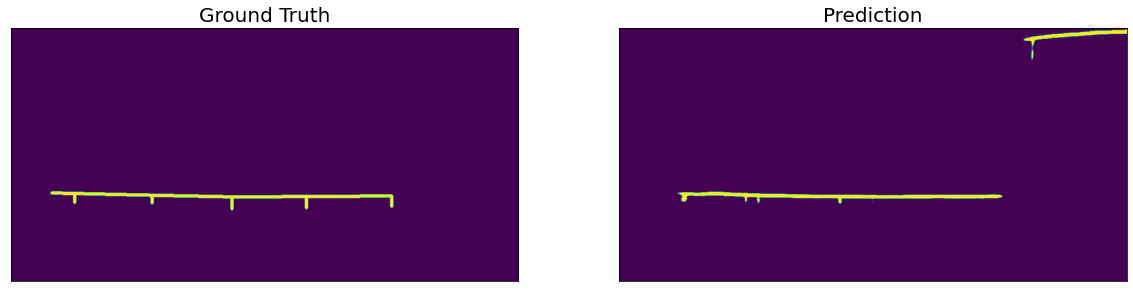

tensor([0.9936, 0.5767])


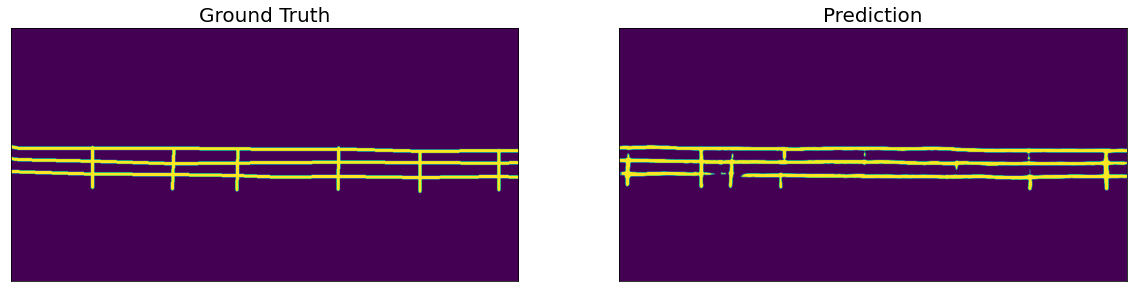

tensor([0.9797, 0.6571])


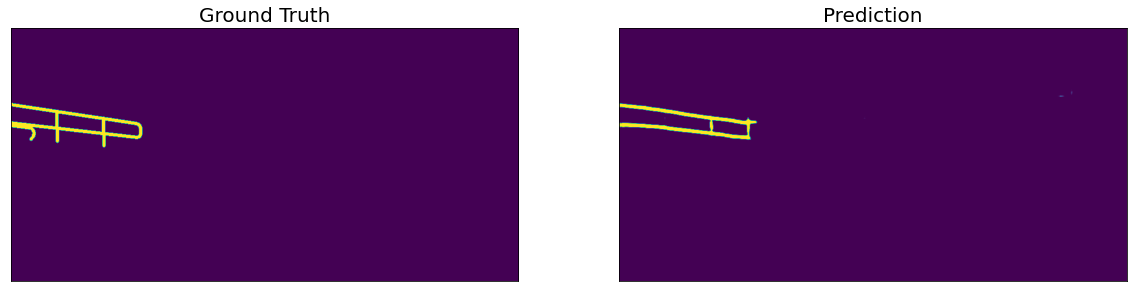

tensor([0.9963, 0.6565])


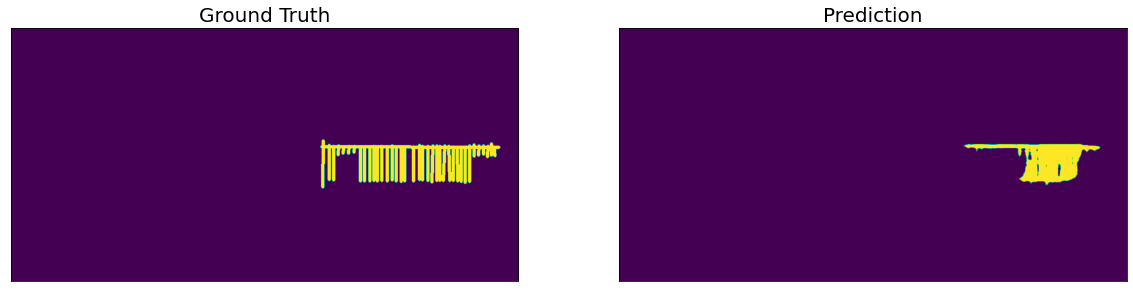

tensor([0.9782, 0.3977])


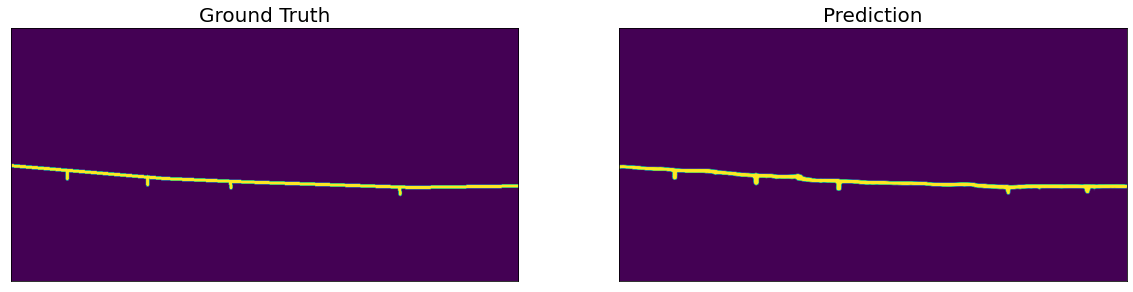

tensor([0.9933, 0.6505])


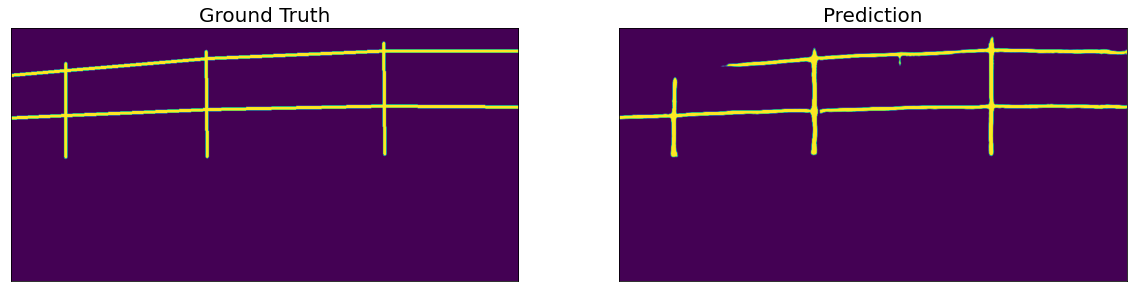

tensor([0.9860, 0.6810])


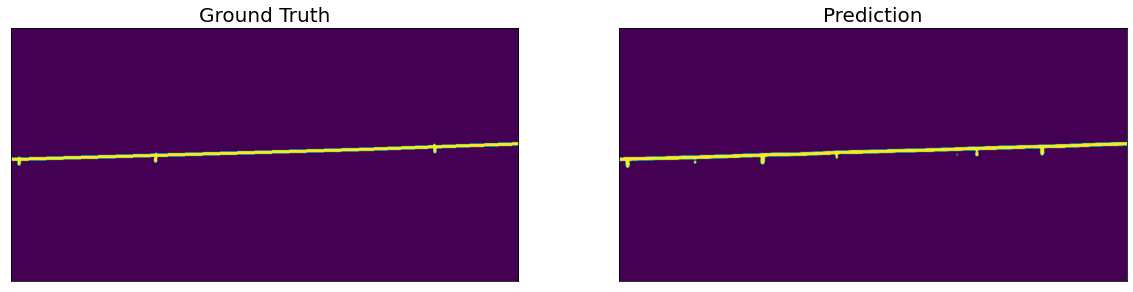

tensor([0.9963, 0.7793])
tensor([0.9890, 0.6284])


In [3]:
%matplotlib inline

miou = 0
IoU = JaccardIndex(num_classes=2, reduction='none')
mAP = MeanAveragePrecision()

for i, (image, mask) in enumerate(data):
    mask = np.squeeze(mask)
    x = torch.as_tensor(image).unsqueeze(0).cuda()
    
    pred = model(x).detach().squeeze().cpu()#.numpy()
    image = np.transpose(image, (1, 2, 0))
    
    visualize(ground_truth=mask,
              prediction=pred)

    print(IoU(torch.as_tensor(pred).unsqueeze(0), torch.as_tensor(mask).unsqueeze(0).int()))
    miou += IoU(torch.as_tensor(pred).unsqueeze(0), torch.as_tensor(mask).unsqueeze(0).int())
    
    if i > 5:
        break
    
print(miou / (i + 1))